# Homework 4

## Ken Miura

Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in this header, with your name. 
2. Complete all questions/problems. **Make sure to run all cells so that your output is visible**. You can usually do this by choosing "restart & run all" from the Kernel menu. 
3. Email me your notebook (.ipynb file) to jonathan.reeve@columbia.edu, with the subject "yourname - HW4," replacing "yourname" with your name. Please don't email me archives (`.zip` or `.tar.gz`). 

In [1]:
import requests
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.decomposition import PCA
import pandas as pd
from collections import Counter

### 1. Install SpaCy and the SpaCy language model called `en_core_web_lg`. It is important that you get this particular language model, as the others don't have the features we'll need. 

You can work together in groups (probably in groups where you all run the same operating system). 

There are installation instructions [here on the SpaCy website](https://spacy.io/usage/) that list a number of command-line commands to run. To run command-line commands: 

 - **Linux**: open a terminal. 
 - **MacOS**: open the Terminal app. (Hint: you can open Spotlight, the magnifying glass icon in the upper right, and type "terminal")
 - **Windows**: open Powershell. (Open the Start menu, then type "powershell.") Alternatively, download Git BASH, which is included in GitHub Desktop. 

Whenever you see command-line commands, they're usually prefixed with `$` or `#`. A `$` means to run the command as a regular user, and a `#` means to prefix your command with `sudo`. You'll generally only see `$`, and you're already running as a regular user, so all you'll need to do is to type in the command that follows the `$`, i.e. not including the `$`. So if the command is shown in the SpaCy docs as `$ conda install -c conda-forge spacy`, open a terminal and type `conda install -c conda-forge spacy`, exactly as written. 

When following the SpaCy instructions, you'll want to choose `conda` as your package manager (because you've installed Anaconda), and 'python3' as your Python version, since we're using Python 3 in this course. Don't select `virtualenv` unless you really know what you're doing. 

To show that you've successfully installed this stack, please run the two cells below, to show that it's not giving you errors. 

In [2]:
import spacy

In [3]:
nlp = spacy.load('en_core_web_lg')

### 2. Create the corpus that you'll use for your final project, load it into this notebook, put it into a single variable (e.g., a dictionary), and show some basic text statistics. 
 
Feel free to use [corpus-db.org](http://corpus-db.org) to assemble your corpus. If you need any help in using it, please ask in Zulip! You can use it to get, say, 30 detective novels relatively easily, or 30 novels that feature young women, or 30 novels set in Paris. You can also get all the works by a certain author this way. But be careful to know exactly what texts you're getting. Project Gutenberg includes texts in a number of languages, prune your texts carefully. 

Stick with English texts, please. NLP in other languages is possible, but requires a different set of tokenizers and other tools that we haven't used yet in this course. It's also good idea to work with texts that are originally written in English, since translations have the problem of introducing translator's word choices to the set of word choices that the author has already made.

Your corpus should be a collection of texts, stored in one variable. However, it doesn't have to be a collection of *works*. Rather, it can be all the narratives in _The Moonstone_, all of Katherine Mansfield's stories, all of Joyce's stories, or some combination of the above, based on theme or genre. It can also be all the novels of a certain writer, or of five writers. 

Comparisons make for good corpora. Why not compare, say, all of the Joyce stories to all of the Mansfield stories? 

You can also use certain APIs to get texts like book reviews from sites like Goodreads. Use `requests.get` along with a URL you get from the API's documentation. Maybe you're interested in comparing texts with book reviews? 

Your corpus might change a little by the time you finish your final project, and that's OK, but try not to change it completely. 

Make sure to clean your corpus of paratext: tables of contents, Project Gutenberg copyright licenses, page numbers, etc, since these will throw off text statistics. 

Show at least four types of text statistics, like: 
 - Length of each text or text segment, in words. 
 - Titles (labels) for each text or text segment. 
 - Type/token ratio of each text or text segment. What do you notice here? 
 - Collocations and/or frequent content n-grams for each. What do you notice? 
 - A pattern like JJ-JJ-JJ-NN, or 'like a JJ NN'. 
 - Anything else you're interested in knowing/showing about this corpus. 

 
**Include at least one paragraph of markdown where you describe your exploratory analysis.**

In [4]:
inauguralDict = {fileid.replace('.txt', ''): nltk.corpus.inaugural.words(fileid) 
                 for fileid in nltk.corpus.inaugural.fileids()}

In [5]:
def cleanIt(tokens):
    clean = [t.lower() for t in tokens if t.isalpha()]
    return clean

def getTTR(tokens):
    clean = cleanIt(tokens)
    return len(set(clean)) / len(clean)

def commonNgrams(tokens, n):     
    clean = cleanIt(tokens)
    ngrams = nltk.ngrams(clean, n)
    return Counter((ngrams)).most_common(10)

def findHyperbaton(tokens):
    tagged = nltk.pos_tag(tokens)
    adjectivetags = ['JJ', 'JJR', 'JJS']
    nountags = ['NN', 'NNS', 'NNP', 'NNPS']
    pattern = [(w1, w2, w3) for (w1, t1), (w2, t2), (w3, t3) in nltk.ngrams(tagged, 3)
              if t1 in 'IN' and t2 in nountags and t3 in adjectivetags]
    return Counter(pattern)

def basicAnalysis(tokens):
    length = len(cleanIt(tokens))
    ttr = getTTR(tokens)
    print(f'word count: {length}') 
    print(f'type to token ratio: {ttr:.2f}')
    trigrams = pd.Series(commonNgrams(tokens, 3))
    print(f'10 most common trigrams\n\n {trigrams}\n')
    print(f'List of noun-adjective hyperbatons:\n\n {pd.Series(findHyperbaton(tokens), dtype=str)}\n\n')
    print('--------------------------------------------------------------')
          

In [6]:
texts = [text for fileid, text in inauguralDict.items()]
avgLen = sum(map(len, texts)) / len(inauguralDict)
avgTTR = sum(map(getTTR, texts)) / len(inauguralDict)
print("Basic Analysis of Inaugural Address Corpus")
print(f'Average Word Count: {avgLen:.2f}\nAverage TTR: {avgTTR:.2f}\n\n')
print('--------------------------------------------------------------')
for fileid, text in inauguralDict.items():
    print(fileid + '\n')
    basicAnalysis(text)

Basic Analysis of Inaugural Address Corpus
Average Word Count: 2582.71
Average TTR: 0.36


--------------------------------------------------------------
1789-Washington

word count: 1430
type to token ratio: 0.41
10 most common trigrams

 0                  ((in, which, i), 3)
1                ((the, house, of), 2)
2    ((house, of, representatives), 2)
3                ((of, which, the), 2)
4              ((of, the, present), 2)
5               ((by, my, country), 2)
6             ((a, retreat, which), 2)
7                  ((as, well, as), 2)
8               ((of, my, country), 2)
9                 ((ought, to, be), 2)
dtype: object

List of noun-adjective hyperbatons:

 Series([], dtype: object)


--------------------------------------------------------------
1793-Washington

word count: 135
type to token ratio: 0.67
10 most common trigrams

 0    ((fellow, citizens, i), 1)
1        ((citizens, i, am), 1)
2           ((i, am, again), 1)
3      ((am, again, called), 1)
4    ((again,

I still haven't decided whether this is the corpus I will be using for my final project, but given my interest in journalism, conducting nlp analysis on historical speeches is right up my alley. I enjoyed doing these analyses, as well as the stylometric analysis I conducted for the question below. Some primary takeaways from this basic analysis here are:
- Outliers aside, it seems the length for inaugural addresses have been trending down. 
- The legend of the shortest-serving president, William Harrison(1841), seems to be true. He spoke for far longer than any other president in history and quite literally repeated himself to death in the freezing cold. Poor dude.
- There are surprisingly few noun-adjective hyperbatons (i.e. "a nation united). Given the dramatic nature of inaugural addresses, I expected there to be more frequent use of this rhetorical device. Even Harrison, who talked himself to death, only had 4 such phrases in his speech. 

I'd be interested in pursuing the line of 'dark' and 'light' words and tying it to sentiment analysis to visually articulate the tone of these speeches to see if they line up with events in American history. I could of course do a similar analysis on other corpora, though I feel this analysis would be most effective on political or religious texts that tend to be more 'opinionated'. 

### 3. Complete ONE of the following mini-projects. 

**Make sure to write at least one paragraph where you describe and explain your results in terms of the text(s) you're studying.**

1. Explore the differences between quoted and non-quoted text, in either Joyce's, or in Mansfield's stories. What kinds of words/POSes appear more often in each category? Use any techniques we've learned so far. 
2. Explore the Brown Corpus, by category. What kinds of words/POSes appear more often in each category? Run a comparative stylometric analysis of its categories. Create a visualization or two of your explorations. 
3. Conduct a comparative stylometric analysis of a corpus of your choosing, using PCA. (Maybe the Brown Corpus, Inaugural Address Corpus, your corpus from #2 above, or a corpus of chapters in _The Moonstone_. According to your PCA output, which are the outliers (the most statistically dissimilar from the others)? Which are the most similar to each other? Why do you think this is? Repeat this process with content words, instead of style words. 
5. Make a simple genre categorizer that tries to guess the genre of a text, based on word frequencies derived from the Brown corpus. Test it on a few texts, like Mansfield's stories. 
6. Make two mini-corpora from Joyce or Mansfield stories. You might want to try: dialogue vs. non-dialogue, sentences containing male vs. female pronouns, paragraphs containing descriptions of body parts vs. not containing them. Do a comparative sentiment analysis of these two categories, or a comparative macro-etymological analysis. 
7. Run a sentiment analysis across narrative time, for all of Joyce's or Mansfield's stories, combined, such that you're comparing all the first sentences of each story, and all the last of each. Do their stories start happy and end unhappy? Or vice-versa? Why do you suppose this is?

In [7]:
vectStyle = TfidfVectorizer(max_features=400, use_idf=False)
vectContent = TfidfVectorizer(stop_words='english', max_features=400, use_idf=False)

addresses = [nltk.corpus.inaugural.raw(fileid) 
            for fileid in nltk.corpus.inaugural.fileids()]
speakers = [fileid.replace('.txt', '') for fileid in nltk.corpus.inaugural.fileids()]

In [8]:
def reduceVectors(vectorizers):    
    reducedVects = []
    for vect in vectorizers:
        inauguralFq = vect.fit_transform(addresses).todense()
        inauguralWords = vect.get_feature_names()
        pca = PCA(n_components = 2)
        inauguralReduced = pca.fit_transform(inauguralFq)
        reducedVects.append(inauguralReduced)
    return reducedVects

In [9]:
vects = zip(('Style', 'Content'), (reduceVectors([vectStyle, vectContent])))

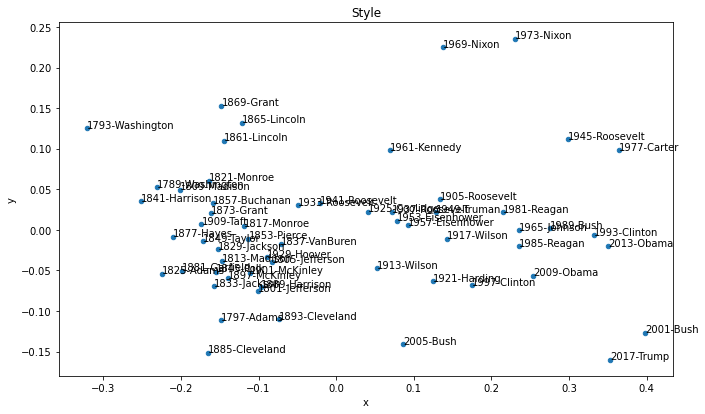

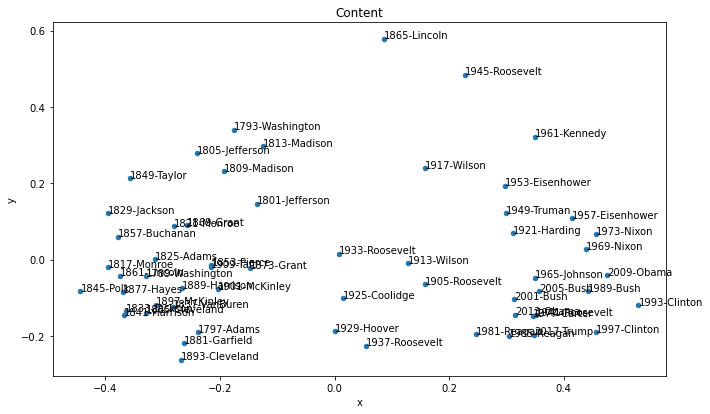

In [10]:
for label, vect in vects:
    df = pd.DataFrame(vect, columns = ['x', 'y'], index = speakers)
    ax = df.plot(kind = 'scatter', x = 'x', y = 'y', figsize = (11, 6.5), title = label)
    for title, points in df.iterrows():
        ax.annotate(title, points)

I'd like to begin by pointing out the hilarity of having Dubya and Trump isolated in the bottom right corner for style words. It's also interesting how isolated Nixon is stylistically from the others, not to mention the fact that I was similarly isolated in the stylometric analysis of our annotations posted on Zulip... I'm not sure what that says about my style of writing. 

Overall, the stylometry of inaugural addresses seem to trend from left to right along the x-axis through time. Older speeches have negative x values, while the more recent ones trend positive. Outliers on the x-axis can threrefore be said to have speech styles atypical of their time. For example, Roosevelt's speech in 1945 was very 'modern' for its time, while his 1933 speech is 'archaic' in its style. Style of speech seems to have undergone a major shift beginning in the 20th Century, with rapid movement rightward from the pre-1900 cluster. This gap between generations is further accentuated when looking at the content analysis. There seems to be a rift between the two sides of the early 20th century, with the few presidents of that era isolated in the middle. It's also apparent that Lincoln and Roosevelt, who spoke during times of war, are isolated at the top in terms of content word analysis.